In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow==2.8.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 44.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: goo

In [ ]:
import tensorflow as tf
print(tf.__version__)  # Versi TensorFlow
print(tf.keras.__version__)  # Versi Keras (integrated in TensorFlow)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-c236c41ba9d8>", line 1, in <cell line: 1>
    import tensorflow as tf
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/__init__.py", line 37, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/__init__.py", line 37, in <module>
    from tensorflow.python.eager import context
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/context.py", line 29, in <module>
    from tensorflow.core.framework import function_pb2
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/framework/function_pb2.py", line 16, in <module>
    from tensorflow.core.framework import attr_value_pb2 as tensorflow_dot_core_dot_framework_dot_attr__value__pb2
  File "/u

TypeError: object of type 'NoneType' has no len()

In [3]:
!pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
pandas-gbq 0.25.0 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.8.1 which is incompatible.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# import keras
from sklearn.datasets import load_files
from google.colab import files

from tensorflow import keras

from timeit import default_timer as timer
import time

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# from keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import img_to_array

# import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical # Import to_categorical from tensorflow.keras.utils
from keras.models import Model
from keras import optimizers
from tensorflow.keras.optimizers import SGD, Adam, Optimizer
from tensorflow.keras import applications
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.densenet import DenseNet121

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.preprocessing import image

from keras.layers import GlobalAveragePooling2D,Dense,Flatten,Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import KFold, train_test_split

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from keras.models import load_model

In [2]:
!unzip "/content/drive/MyDrive/Comvis/ProjekAkhir/kidney_cancer_dataset.zip" -d "/content"   #comment jika runtime ke refresh dan terlihat masih ada dataset di runtime

Streaming output truncated to the last 5000 lines.
  inflating: /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4363).jpg  
  inflating: /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4364).jpg  
  inflating: /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4365).jpg  
  inflating: /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4366).jpg  
  inflating: /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4367).jpg  
  inflating: /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4368).jpg  
  inflating: /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4369).jpg  
  inflating

In [4]:
# Load your dataset
data_dir = '/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
data = load_files(data_dir)
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])

# Check the shape of the original dataset
print('Original number of files:', X.shape[0])
print('Original number of targets:', y.shape[0])

# Set the random seed for reproducibility
np.random.seed(2)

# Randomly select 1000 indices from the total number of files (5000)
random_indices = np.random.choice(X.shape[0], size=1000, replace=False)

# Create new arrays for the randomly selected files and targets
X_random = X[random_indices]
y_random = y[random_indices]

# How the new arrays look like?
print('Randomly selected Data files - ', X_random)
print('Randomly selected Target labels - ', y_random)
print('Number of randomly selected files:', X_random.shape[0])
print('Number of randomly selected targets:', y_random.shape[0])

# Clean up
del data

Original number of files: 12446
Original number of targets: 12446
Randomly selected Data files -  ['/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (2230).jpg'
 '/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (890).jpg'
 '/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (2239).jpg'
 '/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (240).jpg'
 '/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (411).jpg'
 '/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1528).jpg'
 '/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (3888).jpg'
 '/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DA

In [5]:
#We have only the file names in X. Time to load the images from filename and save it to X.
def convert_img_to_arr(file_path_list):
    arr = []
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (224,224))
        img = img_to_array(img)
        arr.append(img)
    return arr

X_ran = np.array(convert_img_to_arr(X_random))
print(X_ran.shape)
print('First training item : ',X_ran[0])
#Note that the shape of training data is (4323, 224, 224, 3)
# 4918 is the number of training items, (224,224) is the target size provided while loading image
# 3 refers to the depth for colored images(RGB channels).

(1000, 224, 224, 3)
First training item :  [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


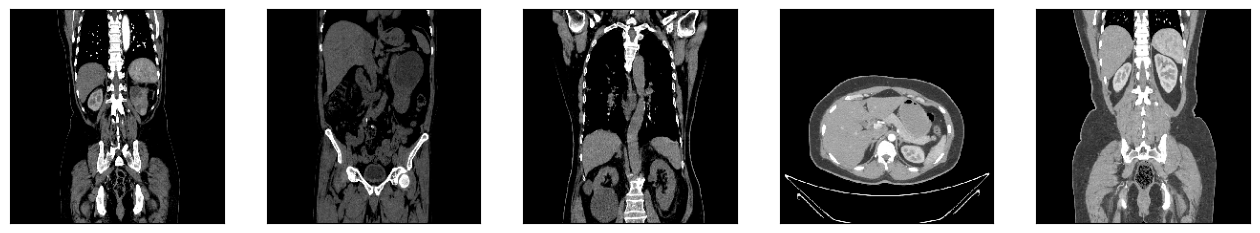

In [6]:
#Let's look at first 5 training data.
fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow((X_ran[i].astype(np.uint8)))

In [7]:
# re-scale so that all values in X lie within 0 to 1
X_ran = X_ran.astype('float32')/255

# Let's confirm the number of classes ;)
no_of_classes = len(np.unique(y_random))
print(no_of_classes)

y_ran = np.array(to_categorical(y_random,no_of_classes))

# y[0]# Note that only one element has value 1(corresponding to its label) and others are 0.

4


In [8]:
# Lets divide into training, validation and testing set

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_trainn, X_test = X_ran, X_ran
y_trainn, y_test = y_ran, y_ran
X_train, X_val, y_train, y_val = train_test_split(X_trainn, y_trainn, test_size=0.2, random_state=42)
del X_trainn, y_trainn

In [9]:
print('X : ',X_ran.shape[0])
print('')

print("Jumlah data X_train = ",X_train.shape[0])
print("Jumlah data X_test = ",X_test.shape[0])
print("Jumlah data X_val = ",X_val.shape[0])
print('')
print('y : ',y_ran.shape[0])
print('')
print("Jumlah data y_train = ",y_train.shape[0])
print("Jumlah data y_test = ",y_test.shape[0])
print("Jumlah data y_val = ",y_val.shape[0])

X :  1000

Jumlah data X_train =  800
Jumlah data X_test =  1000
Jumlah data X_val =  200

y :  1000

Jumlah data y_train =  800
Jumlah data y_test =  1000
Jumlah data y_val =  200


In [10]:
base_model = applications.DenseNet121(weights='imagenet', include_top=False)
print('Loaded model!')

#Let's freeze the first 15 layers - if you see the VGG model layers below,
# we are freezing till the last Conv layer.
for layer in base_model.layers[:15]:
    layer.trainable = False

base_model.summary()

29097984/29084464 [==============================] - 0s 0us/step
Loaded model!
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
         

In [12]:
from tensorflow.keras import applications, optimizers
base_model.summary()

top_model = Sequential()
top_model.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:]))
top_model.add(Dropout(0.5))
top_model.add(Dense(no_of_classes, activation='softmax'))
top_model.summary()

model = Sequential()
model.add(base_model)
model.add(top_model)
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),  # Use learning_rate instead of lr
              metrics=['accuracy'])

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                     

In [13]:
# Time to train our model !
from keras.callbacks import ModelCheckpoint
epochs = 15
batch_size=32
model1_path = '/content/drive/MyDrive/Comvis/ProjekAkhir/model1.hdf5'

train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    X_train,y_train,
    batch_size=batch_size)

validation_generator = test_datagen.flow(
    X_test,y_test,
    batch_size=batch_size)

checkpointer = ModelCheckpoint(model1_path,save_best_only = True,verbose = 1)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs= epochs ,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size,
    callbacks=[checkpointer])
np.save('/content/drive/MyDrive/Comvis/ProjekAkhir/history_save.npy',history.history)

<ipython-input-13-2324350bedc6>:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
25/25 [==============================] - ETA: 0s - loss: 0.6832 - accuracy: 0.4363 
Epoch 1: val_loss improved from inf to 0.56372, saving model to /content/drive/MyDrive/Comvis/ProjekAkhir/model1.hdf5
25/25 [==============================] - 602s 24s/step - loss: 0.6832 - accuracy: 0.4363 - val_loss: 0.5637 - val_accuracy: 0.6230
Epoch 2/15
25/25 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.7563 
Epoch 2: val_loss improved from 0.56372 to 0.39156, saving model to /content/drive/MyDrive/Comvis/ProjekAkhir/model1.hdf5
25/25 [==============================] - 573s 23s/step - loss: 0.3498 - accuracy: 0.7563 - val_loss: 0.3916 - val_accuracy: 0.6895
Epoch 3/15
25/25 [==============================] - ETA: 0s - loss: 0.2359 - accuracy: 0.8625 
Epoch 3: val_loss improved from 0.39156 to 0.32549, saving model to /content/drive/MyDrive/Comvis/ProjekAkhir/model1.hdf5
25/25 [==============================] - 559s 23s/step - loss: 0.2359 - accuracy: 0.8625 - 

In [14]:
model_path = '/content/drive/MyDrive/Comvis/ProjekAkhir/model1.hdf5';
history_path = '/content/drive/MyDrive/Comvis/ProjekAkhir/history_save.npy'

model = load_model(model_path);
history=np.load(history_path,allow_pickle='TRUE').item()

In [15]:
# model.load_weights(model1_path)
(eval_loss, eval_accuracy) = model.evaluate(
     X_test, y_test, batch_size=batch_size, verbose=1)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Accuracy: {:.2f}%".format(eval_accuracy * 100))
print("Loss: {}".format(eval_loss))
print("")
print("Jumlah data X_train = ",X_train.shape[0])
print("Jumlah data X_test = ",X_test.shape[0])

print('')

# Print classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=labels)
print(report)

32/32 [==============================] - 109s 3s/step - loss: 0.0176 - accuracy: 0.9940
Accuracy: 99.40%
Loss: 0.017571276053786278

Jumlah data X_train =  800
Jumlah data X_test =  1000

              precision    recall  f1-score   support

        Cyst       0.99      1.00      0.99       309
      Normal       1.00      1.00      1.00       405
       Stone       0.99      0.98      0.98       100
       Tumor       1.00      0.99      0.99       186

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



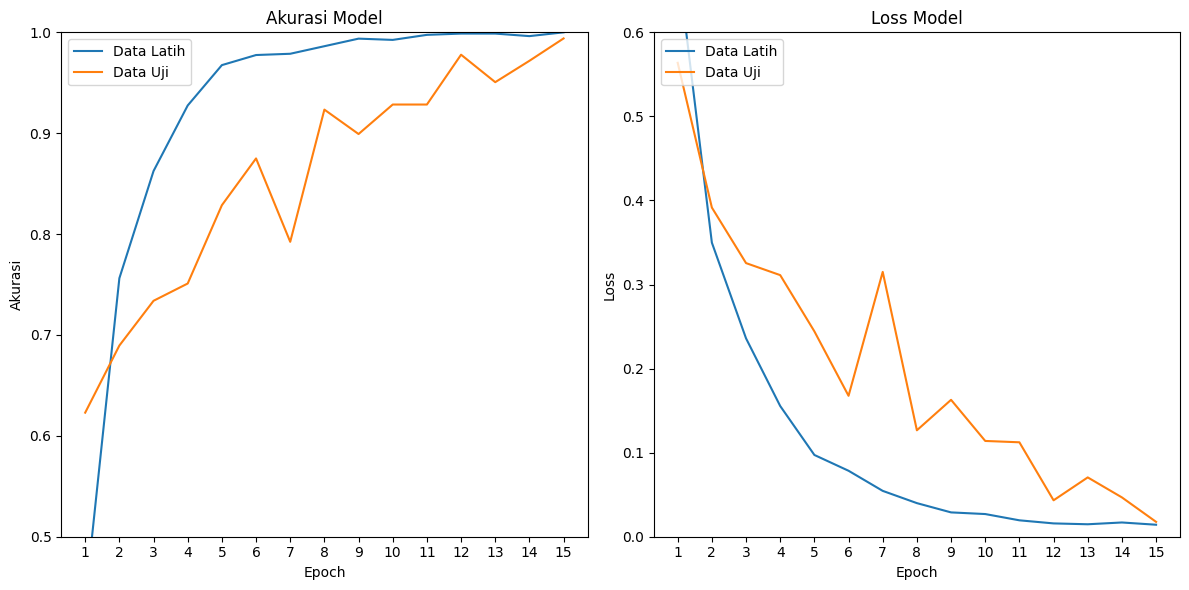

In [16]:
import matplotlib.pyplot as plt

# Let's visualize the loss and accuracy with respect to epochs
def plot(history):
    epochs = range(1, len(history['accuracy']) + 1)  # Create a range for epoch numbers

    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['accuracy'], label='Data Latih')
    plt.plot(epochs, history['val_accuracy'], label='Data Uji')
    plt.title('Akurasi Model')
    plt.ylabel('Akurasi')
    plt.xlabel('Epoch')
    plt.xticks(epochs)  # Set x-axis ticks to integer epochs
    plt.legend(loc='upper left')
    plt.ylim([0.5, 1])  # Set y-axis limits for accuracy

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['loss'], label='Data Latih')
    plt.plot(epochs, history['val_loss'], label='Data Uji')
    plt.title('Loss Model')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.xticks(epochs)  # Set x-axis ticks to integer epochs
    plt.legend(loc='upper left')
    plt.ylim([0, 0.6])  # Set y-axis limits for loss

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

plot(history)

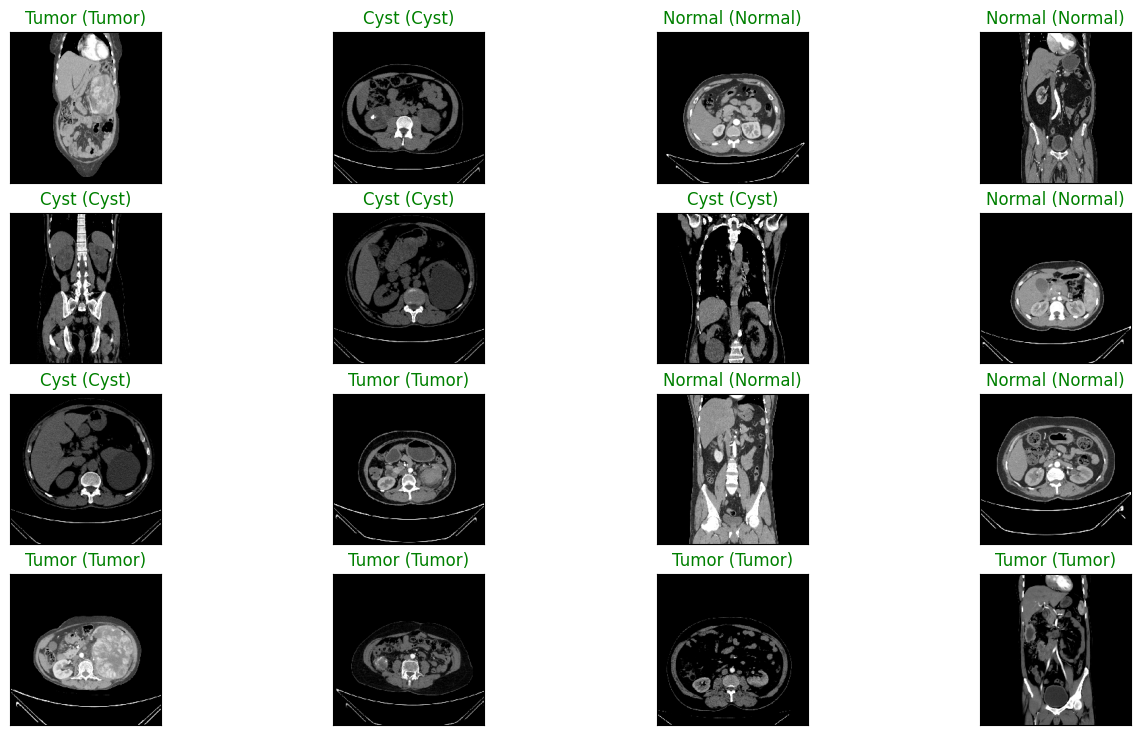

In [17]:
# Let's visualize some random test prediction.
def visualize_pred(y_pred):
# plot a random sample of test images, their predicted labels, and ground truth
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):# mengambil gmbar random sejumlh 16 dari X_test
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[]) #4,4 itu adalah 4 gambar x 4 gambar kebawah
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(model.predict(X_test))

Text(0.5, 155.72222222222217, 'Predicted')

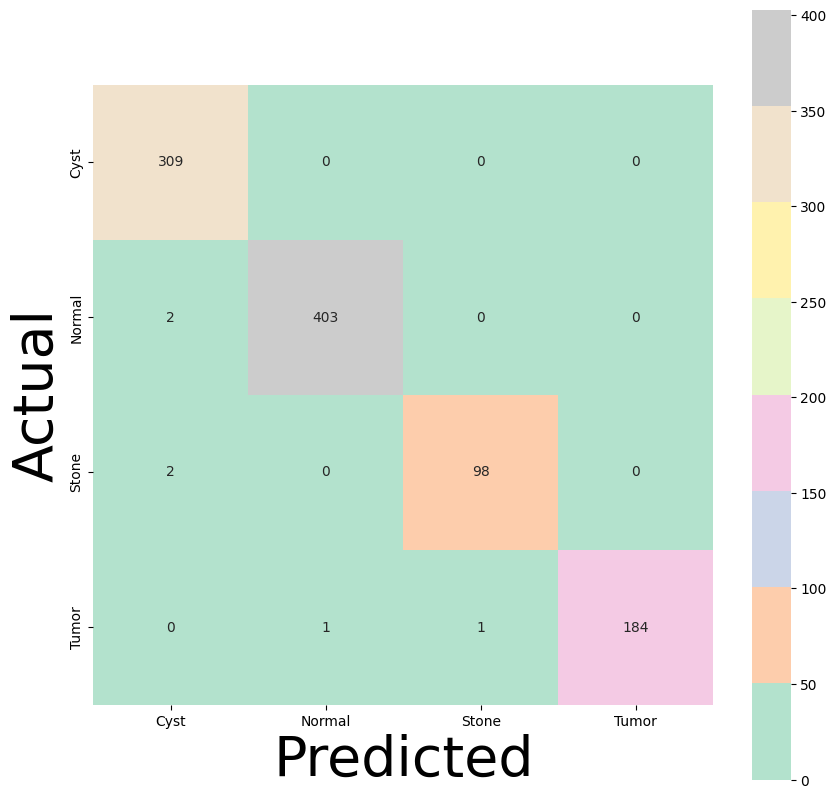

In [18]:
# Confusion Matrix
Y_pred = model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(10, 10))
ax = sns.heatmap(cm, cmap=plt.cm.Pastel2, annot=True, square=True, xticklabels=labels, yticklabels=labels,fmt='d')
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)